# Fourier Transform
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html#fourier-transform

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.simplefilter('ignore')

import gc

from os import path
import sys
sys.path.append(path.abspath('..'))

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from src.config import DATA_PATH
from src.utils import plot_images

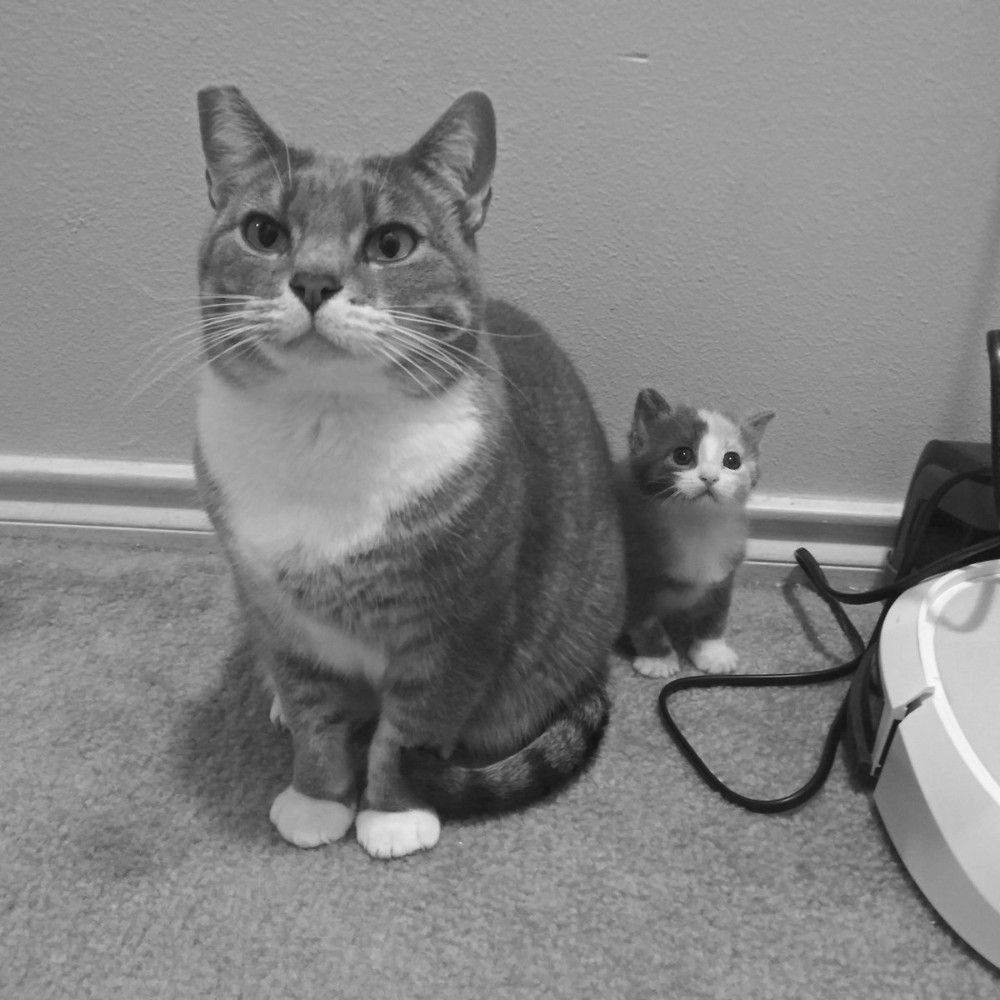

In [4]:
image = cv2.imread(path.join(DATA_PATH, "cat.jpg"), 0)
Image.fromarray(image)

# Fourier in numpy

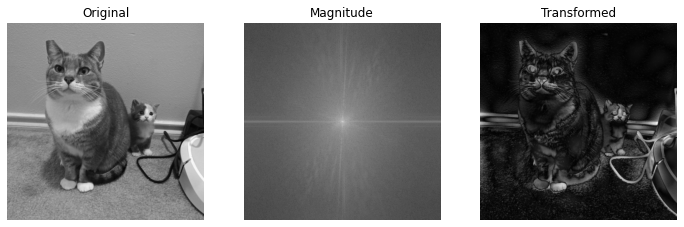

In [14]:
fourier = np.fft.fft2(image)
fourier_shift = np.fft.fftshift(fourier)
magnitude_spectrum = 20 * np.log(np.abs(fourier_shift))

rows, cols = image.shape
crow,ccol = rows // 2 , cols // 2
drop = 5
fourier_shift[crow - drop: crow + drop, ccol - drop: ccol + drop] = 0
fourier_ishift = np.fft.ifftshift(fourier_shift)
image_back = np.fft.ifft2(fourier_ishift)
image_back = np.abs(image_back)

plot_images([image, magnitude_spectrum, image_back],
            names=["Original", "Magnitude", "Transformed"],
            figsize=(12, 5), imshow_kwargs={"cmap": plt.cm.gray})

# Fourier in opencv

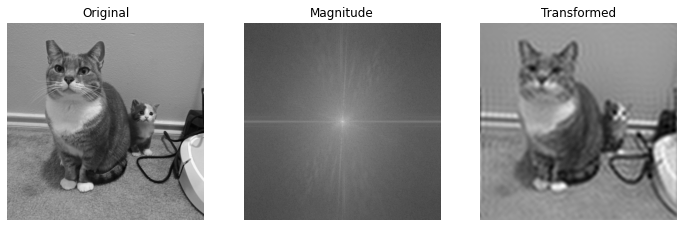

In [19]:
image_dft = cv2.dft(image.astype(np.float32), flags=cv2.DFT_COMPLEX_OUTPUT)
image_dft_shift = np.fft.fftshift(image_dft)

magnitude_spectrum = 20 * np.log(cv2.magnitude(image_dft_shift[..., 0], image_dft_shift[..., 1]))

rows, cols = image.shape
crow,ccol = rows // 2 , cols // 2
mask = np.zeros((rows, cols, 2), np.uint8)
drop = 30
mask[crow - drop: crow + drop, ccol - drop: ccol + drop] = 1

image_dft_shift = image_dft_shift * mask
image_dft_ishift = np.fft.ifftshift(image_dft_shift)

image_back = cv2.idft(image_dft_ishift)
image_back = cv2.magnitude(image_back[..., 0], image_back[..., 1])

plot_images([image, magnitude_spectrum, image_back],
            names=["Original", "Magnitude", "Transformed"],
            figsize=(12, 5), imshow_kwargs={"cmap": plt.cm.gray})

# Filters after DFT

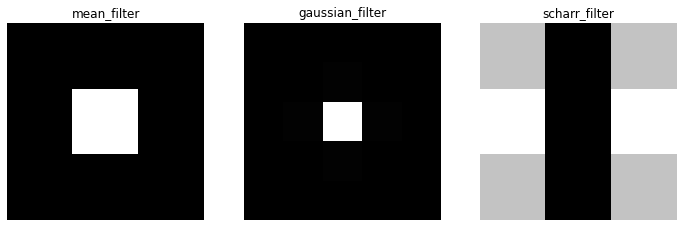

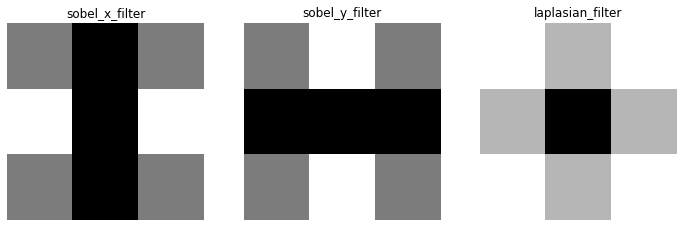

In [28]:
# mean filter
mean_filter = np.ones((3,3))

# gaussian
_gaussian = cv2.getGaussianKernel(5, 10)
gaussian_filter = _gaussian * _gaussian.T

# scharr in x
scharr_filter = np.array([[-3, 0, 3],
                          [-10,0,10],
                          [-3, 0, 3]])

# sobel in x
sobel_x_filter = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])
# sobel in y
sobel_y_filter = np.array([[-1,-2,-1],
                           [0, 0, 0],
                           [1, 2, 1]])

# laplasian
laplasian_filter = np.array([[0, 1, 0],
                             [1,-4, 1],
                             [0, 1, 0]])

filters = [mean_filter, gaussian_filter, scharr_filter,
           sobel_x_filter, sobel_y_filter, laplasian_filter]
filter_names = ["mean_filter", "gaussian_filter", "scharr_filter",
                "sobel_x_filter", "sobel_y_filter", "laplasian_filter"]

fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift_filters = [np.fft.fftshift(x) for x in fft_filters]
magnitude_spectrums = [np.log(np.abs(x) + 1) for x in fft_shift_filters]


plot_images(magnitude_spectrums[:3], names=filter_names[:3],
            figsize=(12, 5), imshow_kwargs={"cmap": plt.cm.gray})


plot_images(magnitude_spectrums[3:], names=filter_names[3:],
            figsize=(12, 5), imshow_kwargs={"cmap": plt.cm.gray})